# Esercitazione di Laboratorio n. 2

Questa esercitazione è incentrata sull'applicazione dell'algoritmo di Metropolis ad un caso unidimensionale.

### Parte I:

Una particella $\alpha$ è emessa isotropicamente da una sorgente con spettro Maxwelliano dato dall'espressione

$\large \displaystyle \frac{d\,N(E)}{d\,E} \propto \sqrt{E-B} \; e^{-\frac{E-B}{T}}$

dove $E$ è l'energia della particella emessa nel sistema di riferimento del laboratorio, $B$ è la barriera di evaporazione e $T \equiv k\, t$, dove $t$ è la temperatura della sorgente.

Utilizzando il metodo di Metropolis, determinare l'energia media della particella per $B=3MeV$ e $T=1.2MeV$. Verificare inoltre se il risultato trovato è consistente con quanto atteso.

Funzione densità di probabilità: $\displaystyle p(E;B,T) = \frac{2}{\sqrt{\pi}} \; \sqrt{\frac{E-B}{T}} \; \frac{e^{-\dfrac{E-B}{T}}}{T}$

Moda: $\displaystyle E_{max} = B + \frac{1}{2}T, \;\; p(E_{max}) = \sqrt{\frac{2}{\pi e}}\; \frac{1}{T}$

Media: $\displaystyle \langle E \rangle = \mu(B,T) = B + \frac{3}{2}T, \;\; p(\langle E \rangle) = \sqrt{\frac{6}{\pi e^3}} \; \frac{1}{T}$

Varianza: $\displaystyle \mathbb{E}\left[(E-\langle E \rangle)^2 \right] = \sigma^2(T) = \frac{3}{2} T^2$

Asimmetria: $\displaystyle m_3=\mathbb{E}\left[ (E-\langle E \rangle)^3 \right] = 3T^3 \;\; \Rightarrow \;\; \gamma_1 = \frac{m_3}{\sigma^3} = 2\sqrt{\frac{2}{3}}$

Curtosi: $\displaystyle m_4=\mathbb{E}\left[ (E - \langle E \rangle)^4 \right] = \frac{63}{4}T^4 \;\; \Rightarrow \;\; \gamma_2 = \frac{m_4}{\sigma^4}-3 = 7-3=4$

In [1]:
import random as ran
import numpy as np
import matplotlib.pyplot as plt
from time import time
from math import sqrt, exp, pi, e

B,T = 3., 1.2
def p(E):                                                 #definisco la probabilità per casi. Questo risponde sia alla
    if E<B:                                               #fisica del fenomeno - una particella alpha ha probabilità nulla
        return 0.                                         #di essere espulsa con energia minore della barriera B...
    else: return 2/(sqrt(pi)*T) * sqrt((E-B)/T) * exp(-(E-B)/T)
p_vec = np.vectorize(p)                                   #sia all'implementazione dell'algoritmo di Metropolis - in questo
                                                          #modo vengono scartati tutti i punti minori di B
μ      = B + 3/2*T
σ2     = 3/2*T**2                                         #inizializzo alcune variabili della ditribuzione note per via
mode   = B + T/2                                          #statistica: media, varianza, moda e i valori assunti da p nella
p_mode = sqrt(2/(pi*e))/T                                 #media e nella moda
p_μ    = sqrt(6/(pi*e**3))/T

E0    = mode                                              #parametri per l'algoritmo di Metropolis: E0 è il punto iniziale
δ     = 4.26*T                                            #della catena e conviene sceglierlo in prossimità del massimo;
N     = int(1*10**6)                                      #δ è tarato in modo da far accettare circa 1/3 dei valori proposti
first = 250                                               #e vale 4.26T se il il trial è generato uniformemente, e 3.08T se
                                                          #è generato secondo una gaussiana.
t=time()
Sample = [E0]                                             #Sample è la lista della Markov chain; μ e σ2 _array sono le liste
μ_array,σ2_array = [],[]                                  #con la media e la varianza al crescere della catena. acc0 è il
Sum, Sum2 = E0, E0**2                                     #contatore per il numero di trial accettati subito; acc1 per
acc0,acc1,rej = 0,0,0                                     #gli accettati ma con probabilità inferiore alla precedente; rej
xi = E0                                                   #per i rifiutati.
for i in range(2,N+1):
    x = ran.uniform(xi-δ, xi+δ)
    #x = ran.gauss(xi,δ)                                  #si potrebbe tentare la simulazione sia con un trial uniforme
    if p(x) >= p(xi):                                     #che con uno gaussiano.
        Sample.append(x)
        xi = x                                            #Nell'algoritmo di Metropolis si è cercato di evitare l'impiego
        Sum+=xi                                           #di rapporti (es. p(x)/p(xi)) in modo da escludere la possibilità
        Sum2+=xi**2                                       #di dividere per zero - è proprio il caso in cui il trial finisce
        μ_array.append(Sum/i)                             #al di là della barriera di evaporazione.
        σ2_array.append((Sum2 - Sum**2/(i+1))/i)
        acc0+=1
    else:
        ξ = ran.random()
        if p(xi)*ξ <= p(x):
            Sample.append(x)
            xi = x
            Sum+=xi
            Sum2+=xi**2
            μ_array.append(Sum/i)
            σ2_array.append((Sum2 - Sum**2/i)/(i-1))
            acc1+=1
        else:
            Sample.append(xi)
            Sum+=xi
            Sum2+=xi**2
            μ_array.append(Sum/i)
            σ2_array.append((Sum2 - Sum**2/i)/(i-1))
            rej+=1
            
                                         
m = μ_array[-1]                                         #m e s2 sono gli ultimi elementi della sequenza di medie e varianze,
s2 = σ2_array[-1]                                       #e rappresentano quindi la nostra stima di detti parametri.
Emin = min(Sample)                                      #Emin e Emax occorrono per fissare degli estremi al campionamento
Emax = max(Sample)                                      #della distribuzione; ci si aspetta che Emin sia di poco superiore
t1=time()-t                                             #alla barriera B.

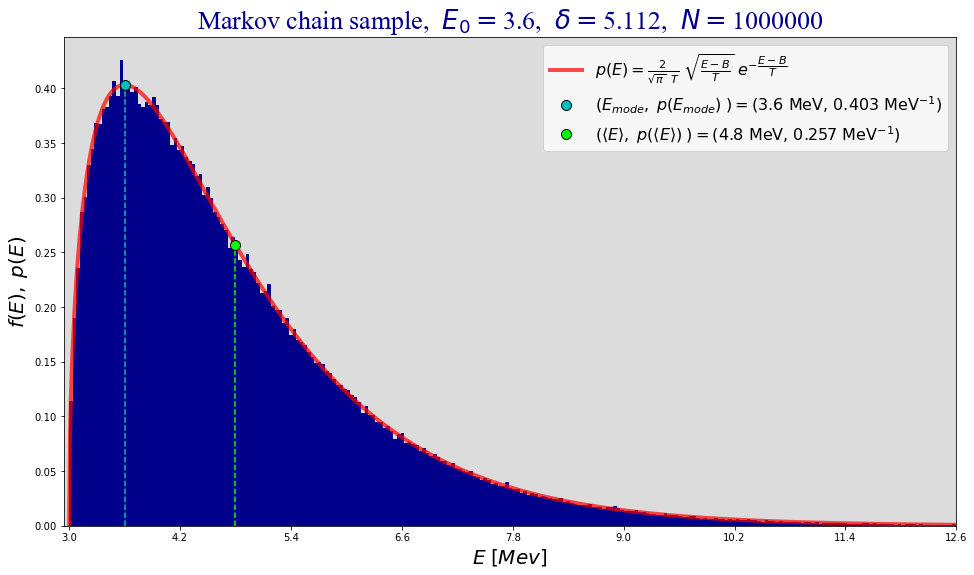

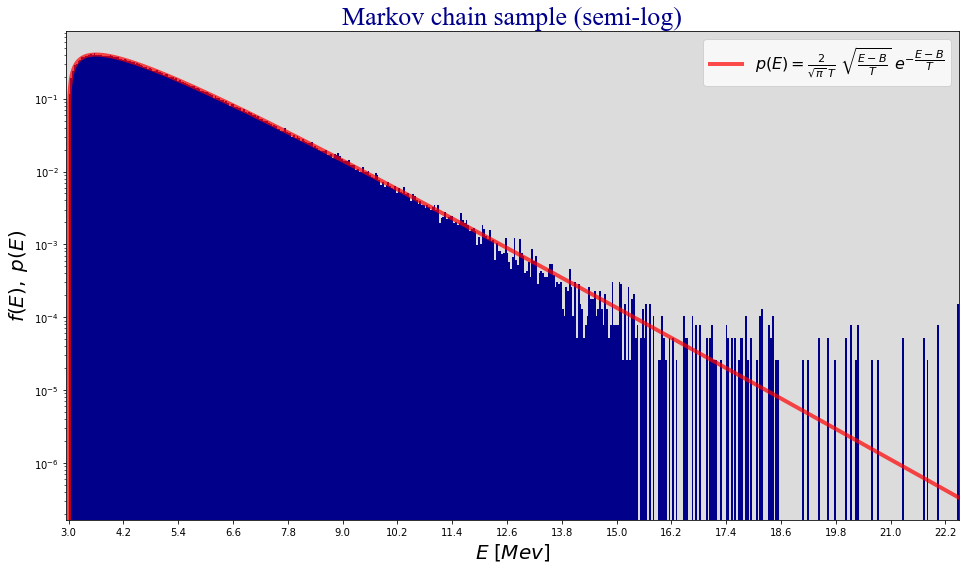

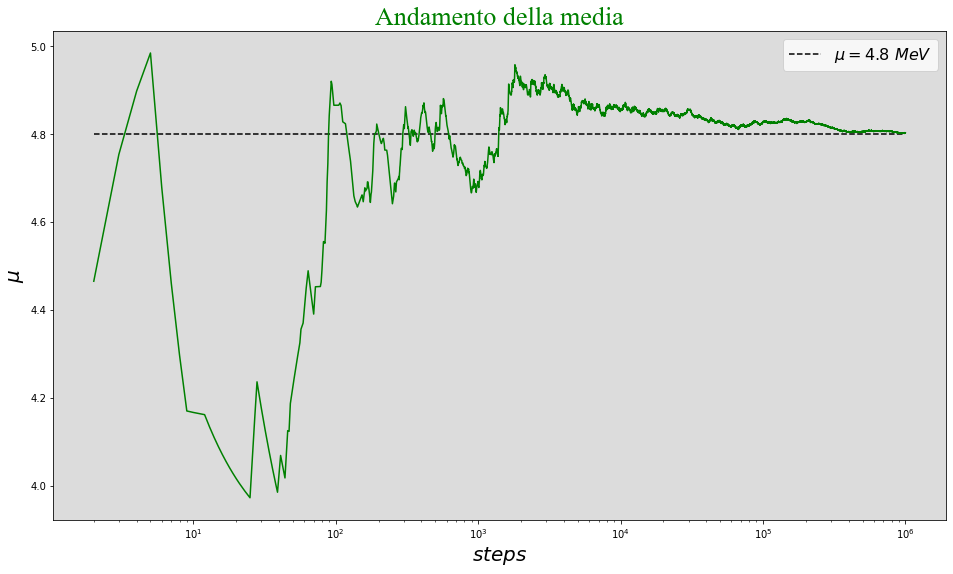

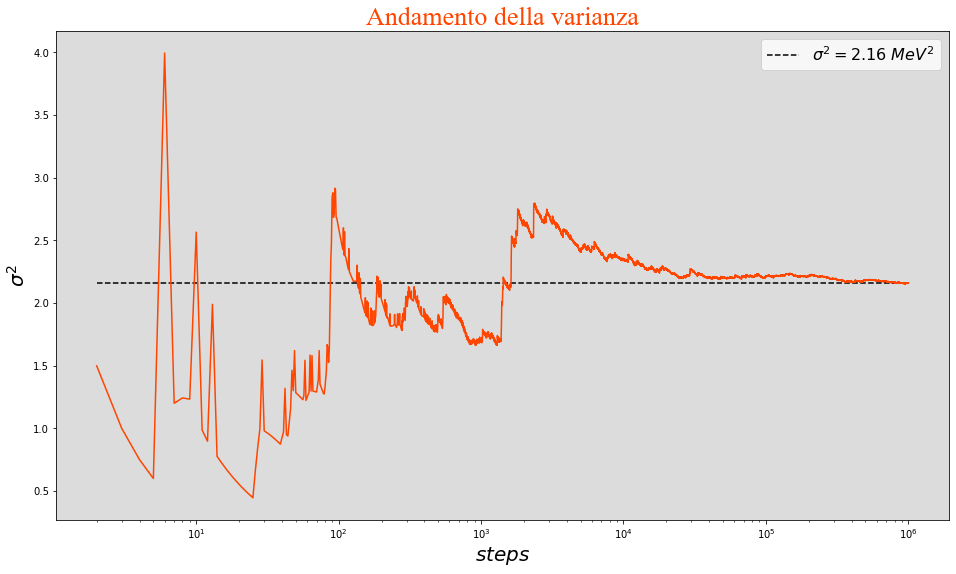

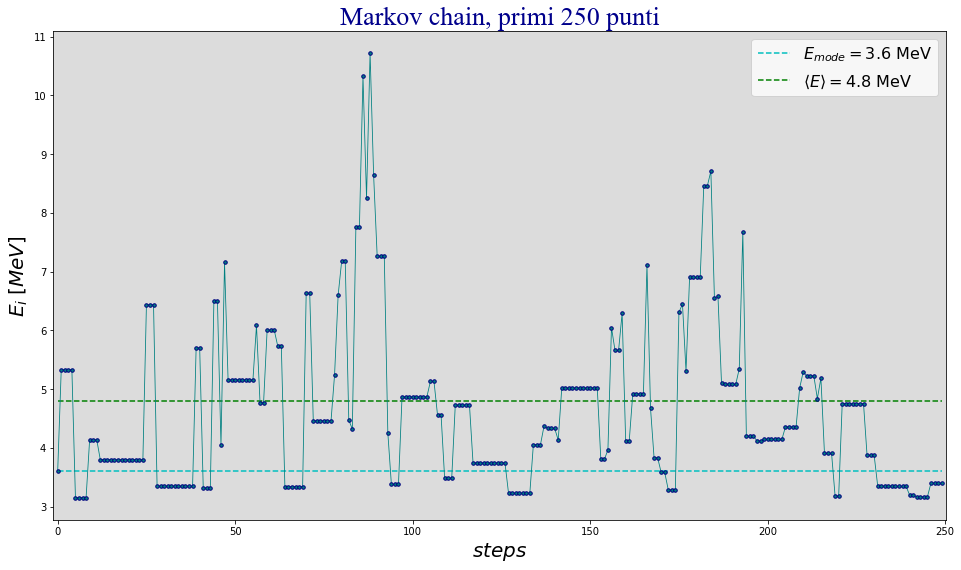

Tempo:       t = 29.63 s
Temperatura: T = 1.393e+10 K

Media:       m = 4.80266 MeV ; μ  = 4.80000 MeV
Varianza:   s² = 2.15706 MeV²; σ² = 2.16000 MeV²

ε media:     ε = 0.05545 %
ε varianza:  ε = 0.1359 %

E minima:  E_m = 3.00017 MeV = B + 0.000140 T
E massima: E_M = 22.4924 MeV = B + 16.24 T

Accettati prima: 166608 su 1000000 ; il 16.66 %
Accettati dopo:  166873 su 1000000 ; il 16.69 %
Rifiutati:       666518 su 1000000 ; il 66.65 %
Somma:           999999


In [2]:
t=time()
X=np.linspace(B,Emax,2000)
font1={'family':'times new roman','color':'darkblue','size':26}

plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Markov chain sample,  $E_0=$'+str(round(E0,3))+',  $\delta=$'+str(round(δ,3))+',  $N=$'+str(N),fontdict=font1)
plt.hist(Sample,bins=500,density=True,color='darkblue')
plt.plot(X,p_vec(X),c='r',lw=4,alpha=0.7,label=r'$p(E)=\frac{2}{\sqrt{\pi}\;\;T}\;\sqrt{\frac{E-B}{T}}\;e^{-\dfrac{E-B}{T}}$')
plt.plot([mode,mode],[0,p_mode],'--c')
plt.plot([μ,μ],[0,p_μ],'--',c='lime')
plt.plot([mode],[p_mode],'o c',mec='k',ms=10,
         label=r'$(E_{mode},\; p(E_{mode})\;)=$'+'('+str(round(mode,3))+' MeV, '+str(round(p_mode,3))+' MeV$^{-1}$)')
plt.plot([μ],[p_μ],'o',c='lime',mec='k',ms=10,
         label=r'$(\langle E\rangle,\;p(\langle E\rangle)\;)=$'+'('+str(round(μ,3))+' MeV, '+str(round(p_μ,3))+' MeV$^{-1}$)')
plt.xlabel('$E\; [Mev]$',size=20)
plt.ylabel('$f(E), \; p(E)$',size=20)
plt.xticks(np.arange(B,Emax+T/2,T))
plt.legend(fontsize=16)
plt.xlim((B-T/20,B+8*T))
plt.show()

plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Markov chain sample (semi-log)',fontdict=font1)
plt.hist(Sample,bins=500,density=True,color='darkblue')
plt.plot(X,p_vec(X),c='r',lw=4,alpha=0.7,label=r'$p(E)=\frac{2}{\sqrt{\pi}\;T}\;\sqrt{\frac{E-B}{T}}\;e^{-\dfrac{E-B}{T}}$')
plt.xlabel('$E\; [Mev]$',size=20)
plt.ylabel('$f(E), \; p(E)$',size=20)
plt.xticks(np.arange(B,Emax+T/2,T))
plt.legend(fontsize=16)
plt.xlim((B-T/20,Emax))
plt.yscale('log')
plt.show()

plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Andamento della media',fontdict=font1,c='g')
plt.xlabel('$steps$',size=20)
plt.ylabel('$\mu$',size=20)
plt.plot([2,N],[μ,μ],'--k',label='$\mu=$'+str(round(μ,3))+' $MeV$')
plt.plot(np.arange(2,N+1),μ_array,c='green')
plt.legend(fontsize=16)
plt.xscale('log')
plt.show()

plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Andamento della varianza',fontdict=font1,c='orangered')
plt.xlabel('$steps$',size=20)
plt.ylabel('$\sigma^2$',size=20)
plt.plot([2,N],[σ2,σ2],'--k',label='$\sigma^2=$'+str(round(σ2,3))+' $MeV^2$')
plt.plot(np.arange(2,N+1),σ2_array,c='orangered')
plt.legend(fontsize=16)
plt.xscale('log')
plt.show()

plt.figure(figsize=(16,9))
ax=plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Markov chain, primi '+str(first)+' punti',fontdict=font1)
plt.plot([0,first-1],[mode,mode],'--c',label=r'$E_{mode}=$'+str(round(mode,3))+' MeV')
plt.plot([0,first-1],[μ,μ],'--',c='green',label=r'$\langle E \rangle =$'+str(round(μ,3))+' MeV')
plt.plot(Sample[:first],'o-',c='teal',mec='navy',ms=3.5,lw=0.8)
plt.xlabel('$steps$',size=20)
plt.ylabel('$E_i\; [MeV]$',size=20)
plt.legend(fontsize=16)
plt.xlim((-0.005*first,1.001*first))
plt.show()

t2=time()-t
t=t1+t2

print('Tempo:       t =','{:#.4g}'.format(t),'s')
print('Temperatura: T =','{:#.4g}'.format(T*10**6*1.602176634*10**(-19)/(1.380649*10**(-23))),'K\n')

print('Media:       m =','{:#.6g}'.format(m),'MeV ; μ  =','{:#.6g}'.format(μ),'MeV')
print('Varianza:   s² =','{:#.6g}'.format(s2),'MeV²; σ² =','{:#.6g}'.format(σ2),'MeV²\n')

print('ε media:     ε =','{:#.4g}'.format(100*abs((m-μ)/μ)),'%')
print('ε varianza:  ε =','{:#.4g}'.format(100*abs((s2-σ2)/σ2)),'%\n')

print('E minima:  E_m =','{:#.6g}'.format(Emin),'MeV = B +','{:#.3g}'.format((Emin-B)/T),'T')
print('E massima: E_M =','{:#.6g}'.format(Emax),'MeV = B +','{:#.4g}'.format((Emax-B)/T),'T\n')

print('Accettati prima:',acc0,'su',N,'; il','{:#.4g}'.format(acc0/N*100),'%')
print('Accettati dopo: ',acc1,'su',N,'; il','{:#.4g}'.format(acc1/N*100),'%')
print('Rifiutati:      ',rej,'su',N,'; il','{:#.4g}'.format(rej/N*100),'%')
print('Somma:          ',acc0+acc1+rej)